In [ ]:
import os
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Load and Preprocess Images
def load_images_with_augmentation(folder):
    images = []
    labels = []
    categories = ['angry', 'happy', 'neutral', 'sad']
    for category in categories:
        path = os.path.join(folder, category)
        label = categories.index(category)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (48, 48))
                img = cv2.equalizeHist(img)  
                images.append(img.flatten()) 
                labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load train and test data
train_images, train_labels = load_images_with_augmentation('Dataset/train')
test_images, test_labels = load_images_with_augmentation('Dataset/test')

In [ ]:

# Step 2: Feature Scaling
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images)
test_images_scaled = scaler.transform(test_images)

In [ ]:

# Step 3: DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=8)
clusters = dbscan.fit_predict(train_images_scaled)

if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(train_images_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print('DBSCAN tidak cukup membentuk cluster untuk perhitungan Silhouette score.')

Silhouette Score: 0.3485


In [ ]:
# Step 4: Train-test split for ANN
X_train, X_val, y_train, y_val = train_test_split(train_images_scaled, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Optimized ANN Model (MLPClassifier) with SGD
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 128), 
                    max_iter=50,  
                    activation='relu', 
                    solver='adam', 
                    alpha=0.01,  
                    learning_rate='adaptive', 
                    learning_rate_init=0.001, 
                    random_state=42)

# Train ANN Model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(512, 256, 128),
              learning_rate='adaptive', max_iter=50, random_state=42)

In [ ]:
# Step 6: Evaluate on train set
y_train_pred = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.9917


In [ ]:

# Step 7: Evaluation on validation set
y_val_pred = mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Confusion Matrix and Classification Report for Validation
val_cm = confusion_matrix(y_val, y_val_pred)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['angry', 'happy', 'neutral', 'sad']))

Validation Accuracy: 0.5146
Validation Classification Report:
              precision    recall  f1-score   support

       angry       0.44      0.37      0.40       779
       happy       0.64      0.70      0.67      1468
     neutral       0.46      0.41      0.44       975
         sad       0.42      0.45      0.43       979

    accuracy                           0.51      4201
   macro avg       0.49      0.48      0.48      4201
weighted avg       0.51      0.51      0.51      4201



In [ ]:

# Step 8: Evaluate on test set
y_test_pred = mlp.predict(test_images_scaled)
test_accuracy = accuracy_score(test_labels, y_test_pred)

# Confusion Matrix and Classification Report for Test
test_cm = confusion_matrix(test_labels, y_test_pred)
print("Test Classification Report:")
print(classification_report(test_labels, y_test_pred, target_names=['angry', 'happy', 'neutral', 'sad']))

Test Classification Report:
              precision    recall  f1-score   support

       angry       0.43      0.39      0.41       958
       happy       0.65      0.71      0.68      1774
     neutral       0.47      0.43      0.45      1233
         sad       0.45      0.46      0.45      1247

    accuracy                           0.52      5212
   macro avg       0.50      0.50      0.50      5212
weighted avg       0.52      0.52      0.52      5212



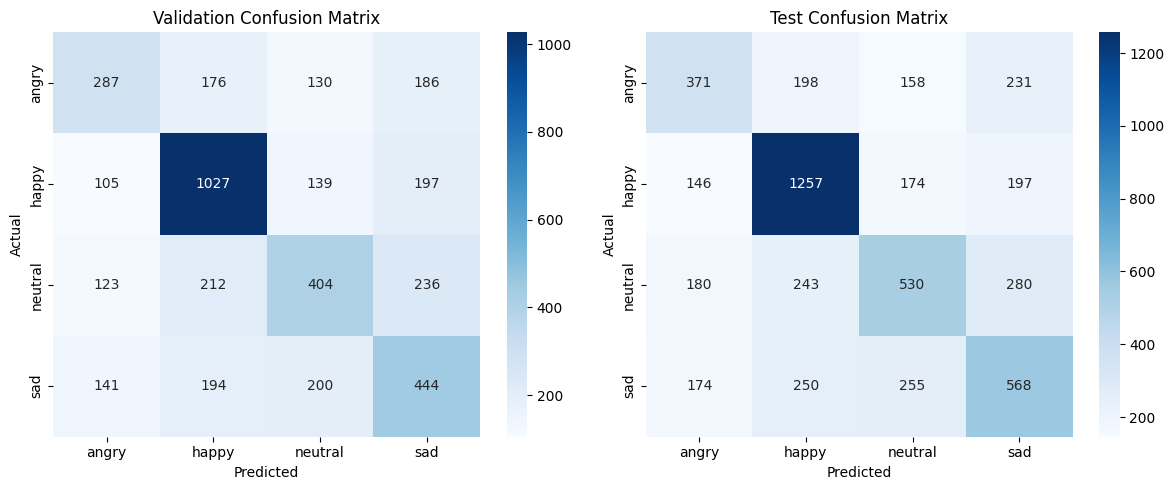

In [ ]:

# Step 9: Validation and test
plt.figure(figsize=(12, 5))

# Heatmap for Validation Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'neutral', 'sad'], yticklabels=['angry', 'happy', 'neutral', 'sad'])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmap for Test Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['angry', 'happy', 'neutral', 'sad'], yticklabels=['angry', 'happy', 'neutral', 'sad'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:

accuracies = np.array([[train_accuracy, val_accuracy, test_accuracy]])
labels = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']

# Print final accuracies
print(f"Final Train Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")


Final Train Accuracy: 0.9917
Final Validation Accuracy: 0.5146
Final Test Accuracy: 0.5230
